## 1. DATA LOADING & CLEANING

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder


In [3]:
data = pd.read_excel("gym recommendation.xlsx")

In [4]:
data.columns

Index(['ID', 'Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes',
       'BMI', 'Level', 'Fitness Goal', 'Fitness Type', 'Exercises',
       'Equipment', 'Diet', 'Recommendation'],
      dtype='object')

In [5]:
data.drop(columns=['ID'], inplace = True)

In [6]:
data.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


In [7]:
data.shape

(14589, 14)

In [8]:
data.isnull().sum()

Sex               0
Age               0
Height            0
Weight            0
Hypertension      0
Diabetes          0
BMI               0
Level             0
Fitness Goal      0
Fitness Type      0
Exercises         0
Equipment         0
Diet              0
Recommendation    0
dtype: int64

In [9]:
print(data.dtypes)


Sex                object
Age                 int64
Height            float64
Weight            float64
Hypertension       object
Diabetes           object
BMI               float64
Level              object
Fitness Goal       object
Fitness Type       object
Exercises          object
Equipment          object
Diet               object
Recommendation     object
dtype: object


In [10]:
# Convert 'age', 'Height', 'weight', 'bmi' to numeric (case-sensitive names)
data[['Age', 'Height', 'Weight', 'BMI']] = data[['Age', 'Height', 'Weight', 'BMI']].apply(pd.to_numeric, errors='coerce')

# Handle missing values if any invalid values are coerced to NaN
data.fillna(0, inplace=True)


print(data[['Age', 'Height', 'Weight', 'BMI']].dtypes)

print(data[['Age', 'Height', 'Weight', 'BMI']].isnull().sum())


Age         int64
Height    float64
Weight    float64
BMI       float64
dtype: object
Age       0
Height    0
Weight    0
BMI       0
dtype: int64


## 2. LABEL ENCODING

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_enc = LabelEncoder()

for col in ['Sex', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type']:
    data[col] = label_enc.fit_transform(data[col])

# Verify the transformation
print(data[['Sex', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type']].head())


   Sex  Hypertension  Diabetes  Level  Fitness Goal  Fitness Type
0    1             0         0      3             0             1
1    1             1         0      3             0             1
2    1             0         1      3             0             1
3    1             1         1      3             0             1
4    1             0         0      3             0             1


In [12]:
data.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,18,1.68,47.5,0,0,16.83,3,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,1,18,1.68,47.5,1,0,16.83,3,0,1,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,1,18,1.68,47.5,0,1,16.83,3,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,1,18,1.68,47.5,1,1,16.83,3,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,1,18,1.68,47.5,0,0,16.83,3,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


## 3. NORMALIZATION

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalize the numerical features with the correct column names
data[['Age', 'Height', 'Weight', 'BMI']] = scaler.fit_transform(data[['Age', 'Height', 'Weight', 'BMI']])


print(data[['Age', 'Height', 'Weight', 'BMI']].head())


       Age    Height   Weight       BMI
0 -1.63391 -0.202298 -1.14858 -1.121606
1 -1.63391 -0.202298 -1.14858 -1.121606
2 -1.63391 -0.202298 -1.14858 -1.121606
3 -1.63391 -0.202298 -1.14858 -1.121606
4 -1.63391 -0.202298 -1.14858 -1.121606


In [14]:
data.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,-1.63391,-0.202298,-1.14858,0,0,-1.121606,3,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,1,-1.63391,-0.202298,-1.14858,1,0,-1.121606,3,0,1,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,1,-1.63391,-0.202298,-1.14858,0,1,-1.121606,3,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,1,-1.63391,-0.202298,-1.14858,1,1,-1.121606,3,0,1,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,1,-1.63391,-0.202298,-1.14858,0,0,-1.121606,3,0,1,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


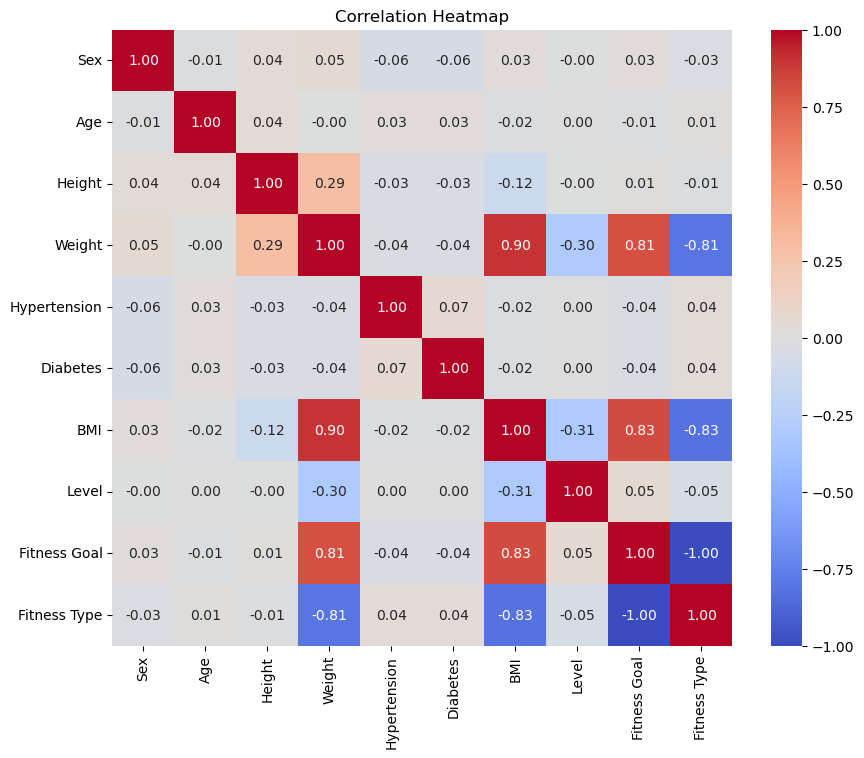

In [15]:

numerical_data = data.select_dtypes(include=[np.number])


corr_matrix = numerical_data.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


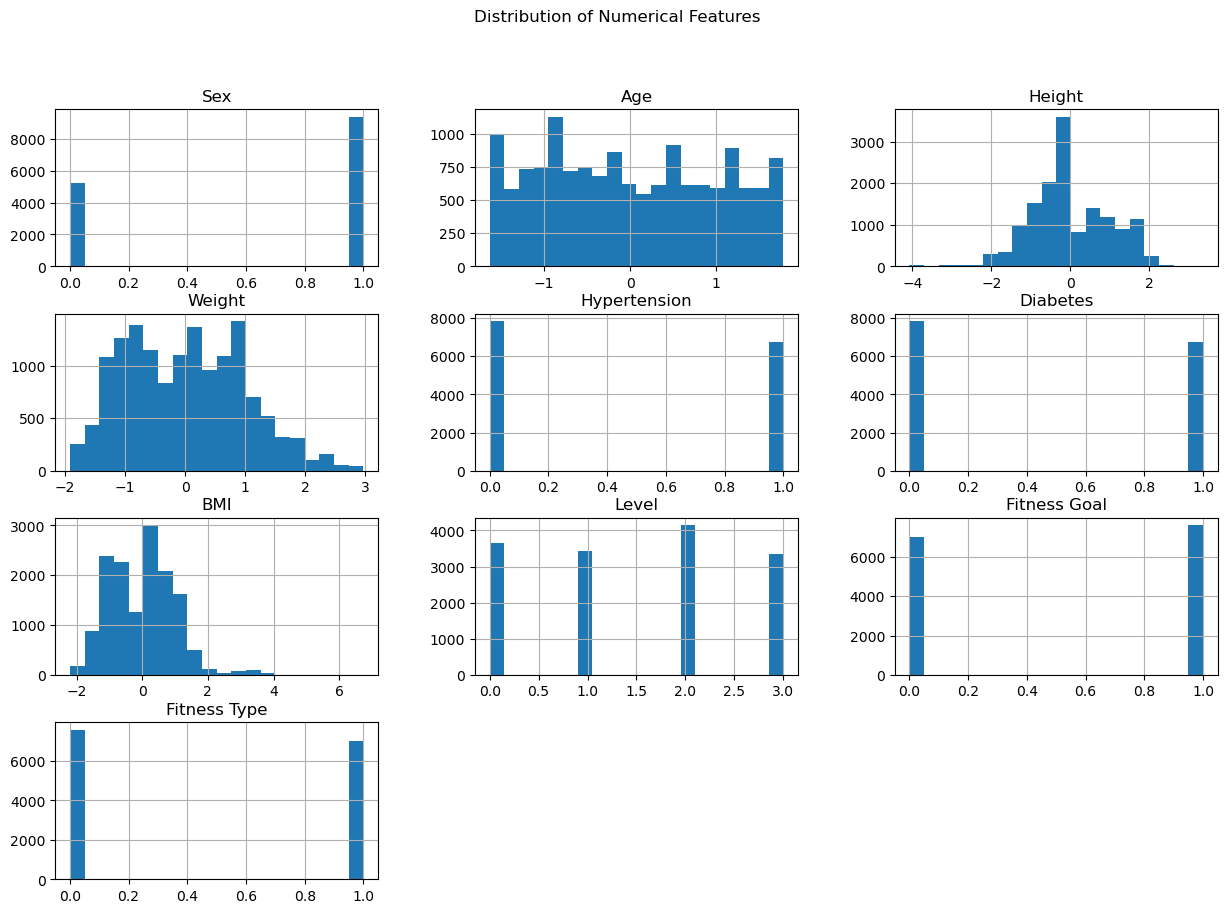

In [16]:
# Plot histograms for numerical columns
data.select_dtypes(include=[np.number]).hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()


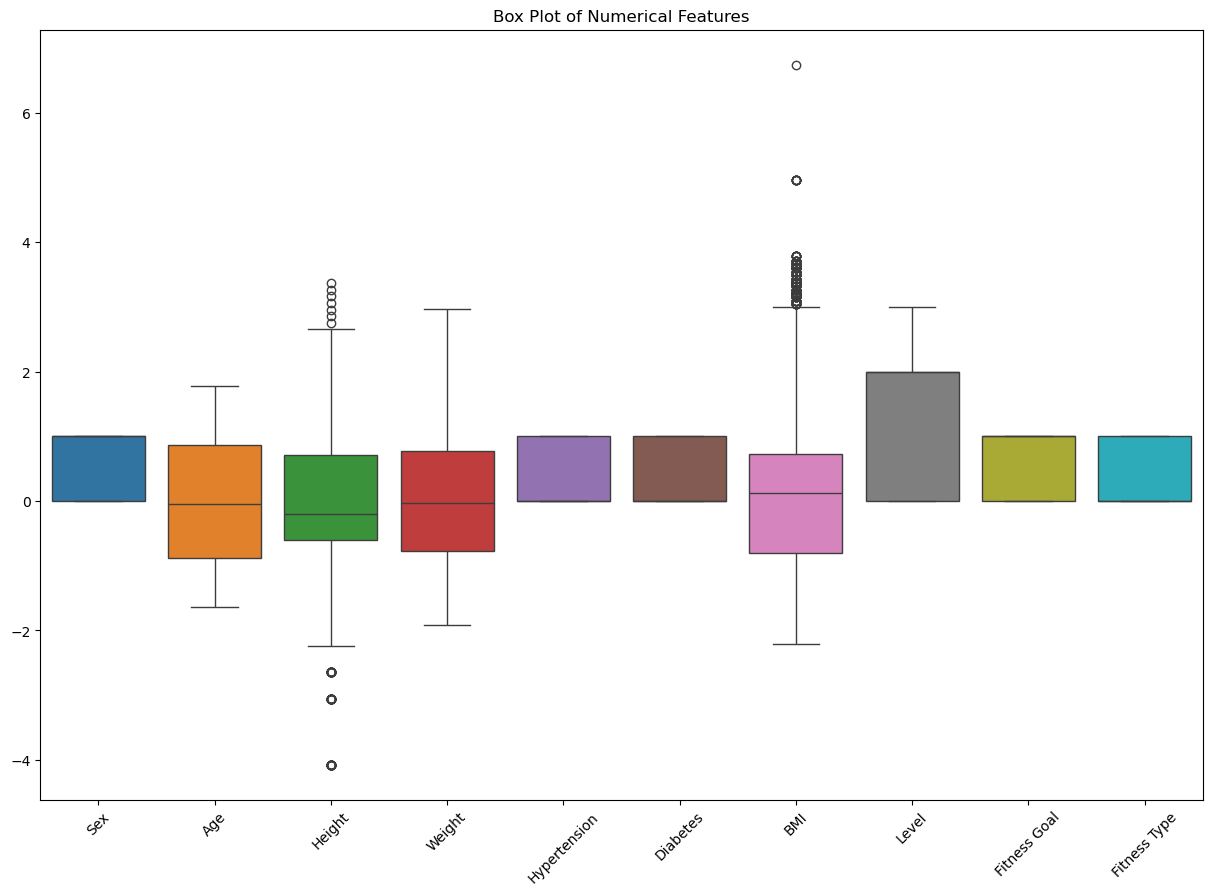

In [17]:
# Plot box plots for numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()


In [19]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Print column names to verify
print("Columns in the dataset:", data.columns)

# Correct column names based on your dataset
columns_to_check = ['Age', 'Height', 'Weight', 'BMI']

# Function to detect and remove outliers using Z-score method
def remove_outliers_zscore(data, columns, threshold=3):
    z_scores = np.abs(zscore(data[columns].apply(pd.to_numeric, errors='coerce')))

    data_no_outliers = data[(z_scores < threshold).all(axis=1)]
    return data_no_outliers

data_no_outliers = remove_outliers_zscore(data, columns_to_check, threshold=3)

# Check the cleaned data
print("Data after removing outliers:\n", data_no_outliers.head())


Columns in the dataset: Index(['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes', 'BMI',
       'Level', 'Fitness Goal', 'Fitness Type', 'Exercises', 'Equipment',
       'Diet', 'Recommendation'],
      dtype='object')
Data after removing outliers:
    Sex      Age    Height   Weight  Hypertension  Diabetes       BMI  Level  \
0    1 -1.63391 -0.202298 -1.14858             0         0 -1.121606      3   
1    1 -1.63391 -0.202298 -1.14858             1         0 -1.121606      3   
2    1 -1.63391 -0.202298 -1.14858             0         1 -1.121606      3   
3    1 -1.63391 -0.202298 -1.14858             1         1 -1.121606      3   
4    1 -1.63391 -0.202298 -1.14858             0         0 -1.121606      3   

   Fitness Goal  Fitness Type  \
0             0             1   
1             0             1   
2             0             1   
3             0             1   
4             0             1   

                                           Exercises  \
0  Squats

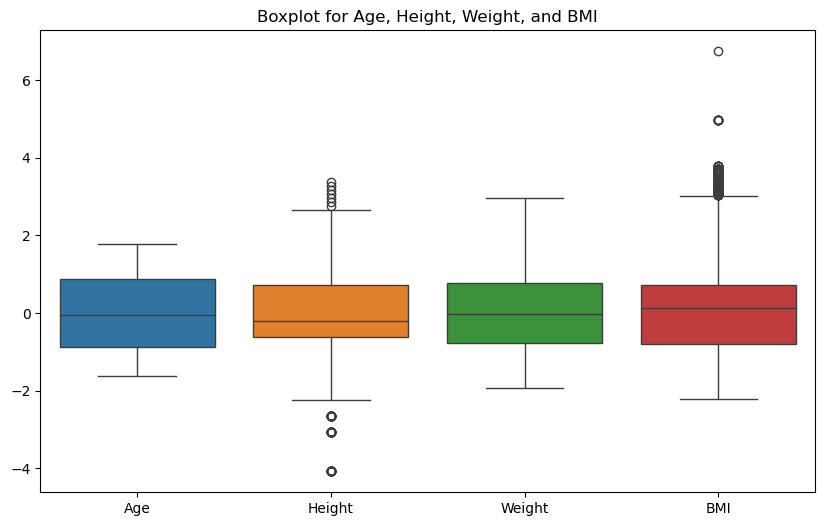

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to visualize
columns_to_plot = ['Age', 'Height', 'Weight', 'BMI']

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[columns_to_plot])
plt.title("Boxplot for Age, Height, Weight, and BMI")
plt.show()


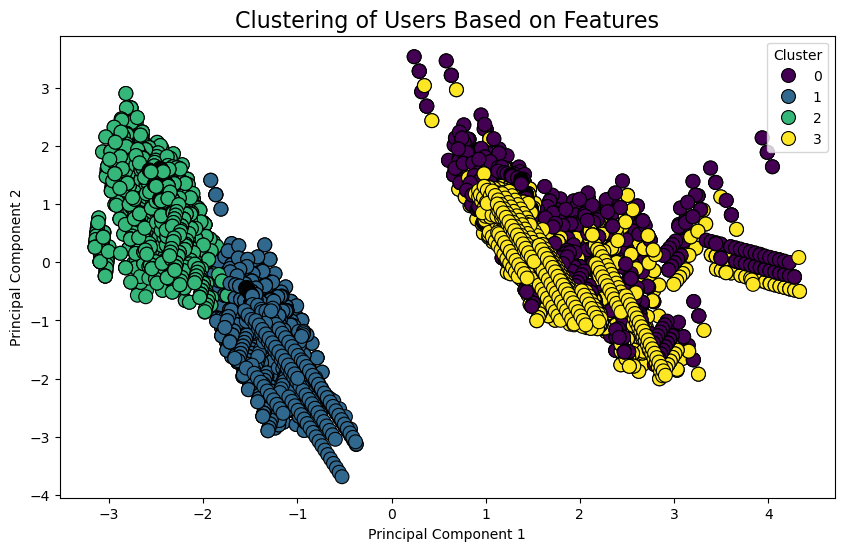

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features for clustering
features = ['Age', 'Height', 'Weight', 'BMI', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type']
X = data[features]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering (you can adjust the number of clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce dimensions for visualization (PCA to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'], palette='viridis', s=100, edgecolor='black')

# Set plot labels and title
plt.title("Clustering of Users Based on Features", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.show()


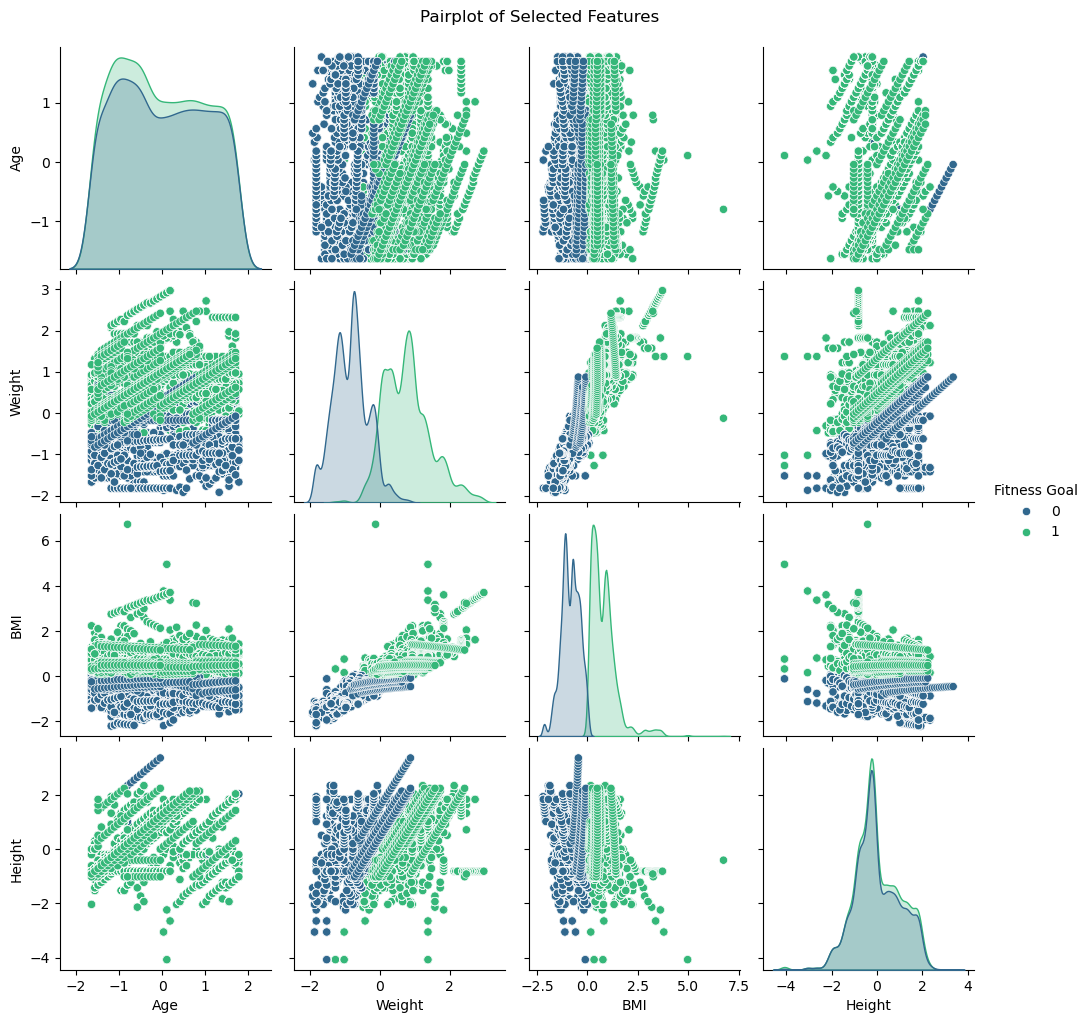

In [22]:
sns.pairplot(data, vars=['Age', 'Weight', 'BMI', 'Height'], hue='Fitness Goal', palette='viridis')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


In [29]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ['Age', 'Height', 'Weight', 'BMI']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Train K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes', 'BMI', 'Level', 'Fitness Goal', 'Fitness Type']])

def get_recommendation_kmeans():
    print("Please enter your details for a personalized workout and diet recommendation.")
    user_input = {
        'Sex': int(input("Enter Sex (Male: 1 / Female: 0): ")),
        'Age': float(input("Enter Age: ")),
        'Height': float(input("Enter Height in meters (e.g., 1.75): ")),
        'Weight': float(input("Enter Weight in kg: ")),
        'Hypertension': int(input("Do you have Hypertension (Yes: 1 / No: 0): ")),
        'Diabetes': int(input("Do you have Diabetes (Yes: 1 / No: 0): ")),
        'BMI': float(input("Enter BMI: ")),
        'Level': int(input("Enter Level (Underweight: 3 / Normal: 0 / Overweight: 2 / Obese: 1): ")),
        'Fitness Goal': int(input("Enter Fitness Goal (Weight Gain: 0 / Weight Loss: 1): ")),
        'Fitness Type': int(input("Enter Fitness Type (Muscular Fitness: 1 / Cardio Fitness: 0): "))
    }

    # Normalize numerical features
    user_df = pd.DataFrame([user_input])
    user_df[numeric_columns] = scaler.transform(user_df[numeric_columns])

    # Predict cluster for the user
    user_cluster = kmeans.predict(user_df[['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes', 'BMI', 'Level', 'Fitness Goal', 'Fitness Type']])[0]
    cluster_data = data[data['Cluster'] == user_cluster]

    # Get the most common recommendations in the cluster
    recommendation = cluster_data[['Exercises', 'Equipment', 'Diet']].mode().iloc[0]

    print("\nRecommended Workout and Diet Plan (K-Means):")
    print("EXERCISES:", recommendation['Exercises'])
    print("EQUIPMENT:", recommendation['Equipment'])
    print("DIET:", recommendation['Diet'])

    # Collect feedback for MRR
    feedback_matrix = []
    feedback = int(input("Was this recommendation relevant? (Yes: 1 / No: 0): "))
    feedback_matrix.append(feedback)

    # Calculate MRR
    relevant_indices = [i + 1 for i, feedback in enumerate(feedback_matrix) if feedback == 1]
    if relevant_indices:
        mrr = np.mean([1 / rank for rank in relevant_indices])
    else:
        mrr = 0.0

    print(f"\nMean Reciprocal Rank (MRR) for K-Means: {mrr:.2f}")

    return recommendation

# Get and evaluate recommendations for K-Means
recommendation_kmeans = get_recommendation_kmeans()


Please enter your details for a personalized workout and diet recommendation.

Recommended Workout and Diet Plan (K-Means):
EXERCISES: Brisk walking, cycling, swimming, running , or dancing.
EQUIPMENT: Ellipticals, Indoor Rowers,Treadmills, Rowing machine
DIET: Vegetables: (Garlic, Mushroom, Green Papper, Icebetg Lettuce); Protein Intake: (Baru Nuts, Beech Nuts, Hemp Seeds, Cheese Spandwich); Juice: (Apple Juice, Mango juice,and Beetroot juice)

Mean Reciprocal Rank (MRR) for K-Means: 1.00


In [ ]:
import pickle
with open('models/kmeans.pkl', 'wb') as f:
    pickle.dump(kMeans, f)

  RANDOM **FOREST**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define numerical and categorical columns
num_features = ['Age', 'Height', 'Weight', 'BMI']
cat_features = ['Sex', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type']

# Label encoding (one encoder per column)
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Save encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Features and target
X = data[num_features + cat_features]
y = data['Recommendation']

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Save the target encoder
with open('target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

# Normalize numerical features
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Accuracy check
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# --- Helper functions ---

def safe_int_input(prompt, valid_values=None):
    while True:
        try:
            val = int(input(prompt))
            if valid_values is not None and val not in valid_values:
                print(f"Please enter a valid value from {valid_values}.")
                continue
            return val
        except ValueError:
            print("Invalid input. Please enter an integer.")

def safe_float_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# --- Recommendation Function ---

def get_recommendation_rf():
    print("\n--- Personalized Workout and Diet Recommendation ---")

    user_input = {
        'Sex': safe_int_input("Enter Sex (Male: 1 / Female: 0): ", [0, 1]),
        'Age': safe_float_input("Enter Age: "),
        'Height': safe_float_input("Enter Height in meters (e.g., 1.75): "),
        'Weight': safe_float_input("Enter Weight in kg: "),
        'Hypertension': safe_int_input("Do you have Hypertension (Yes: 1 / No: 0): ", [0, 1]),
        'Diabetes': safe_int_input("Do you have Diabetes (Yes: 1 / No: 0): ", [0, 1]),
    }

    # Compute BMI
    user_input['BMI'] = user_input['Weight'] / (user_input['Height'] ** 2)

    user_input['Level'] = safe_int_input("Enter Level (Normal: 0, Obese: 1, Overweight: 2, Underweight: 3): ", [0, 1, 2, 3])
    user_input['Fitness Goal'] = safe_int_input("Enter Fitness Goal (Weight Gain: 0, Weight Loss: 1): ", [0, 1])
    user_input['Fitness Type'] = safe_int_input("Enter Fitness Type (Cardio Fitness: 0, Muscular Fitness: 1): ", [0, 1])

    user_df = pd.DataFrame([user_input])

    # Encode categorical features
    for col in cat_features:
        le = label_encoders[col]
        try:
            user_df[col] = le.transform(user_df[col])
        except ValueError:
            print(f"Warning: Unseen value for {col}. Assigning default (0).")
            user_df[col] = 0

    # Normalize numerical features
    user_df[num_features] = scaler.transform(user_df[num_features])

    # Ensure feature order
    user_df = user_df[num_features + cat_features]

    # Predict
    prediction = rf.predict(user_df)

    # Load target encoder
    with open('target_encoder.pkl', 'rb') as f:
        target_encoder = pickle.load(f)

    decoded_label = target_encoder.inverse_transform(prediction)[0]
    recommendation = data[data['Recommendation'] == decoded_label].iloc[0]

    print("\n--- Recommended Plan ---")
    print(f"EXERCISES: {recommendation['Exercises']}")
    print(f"EQUIPMENTS: {recommendation['Equipment']}")
    print(f"DIET: {recommendation['Diet']}")

    # Feedback collection
    feedback_matrix = []
    feedback = safe_int_input("Was this recommendation relevant? (Yes: 1 / No: 0): ", [0, 1])
    feedback_matrix.append(feedback)

    # MRR calculation
    mrr = 1.0 if feedback == 1 else 0.0
    print(f"\nMean Reciprocal Rank (MRR): {mrr:.2f}")

    # NMRR calculation
    relevant_indices = [i + 1 for i, fb in enumerate(feedback_matrix) if fb == 1]
    nmrr = np.mean([1 / rank for rank in relevant_indices]) if relevant_indices else 0.0
    print(f"Normalized Mean Reciprocal Rank (NMRR): {nmrr:.2f}")

    return recommendation

# --- Run ---
recommendation_rf = get_recommendation_rf()
print("\nFinal Recommendation Object:")
print(recommendation_rf)

with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)

C:\Users\Anirudh Garg\AppData\Local\Temp\ipykernel_3204\1086002680.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_features] = scaler.fit_transform(X[num_features])


Model Accuracy: 95.05%

--- Personalized Workout and Diet Recommendation ---

--- Recommended Plan ---
EXERCISES: brisk walking, cycling, swimming, or dancing.
EQUIPMENTS: Kettlebell, Dumbbells, Yoga Mat, Treadmill
DIET: Vegetables: (Garlic, Mushroom, Green Papper, Icebetg Lettuce); Protein Intake: (Baru Nuts, Beech Nuts, Hemp Seeds, Cheese Spandwich); Juice: (Apple Juice, Mango juice,and Beetroot juice)

Mean Reciprocal Rank (MRR): 1.00
Normalized Mean Reciprocal Rank (NMRR): 1.00

Final Recommendation Object:
Sex                                                                       1
Age                                                                -1.63391
Height                                                            -0.202298
Weight                                                             0.074589
Hypertension                                                              1
Diabetes                                                                  1
BMI                        

## 4. RECOMMENDATION, FEEDBACK & EVALUATION

`Cosine similarity` is a metric used to measure how similar two vectors are
  - Once the cosine similarity scores are calculated between the new user's profile and existing users, the system identifies the top similar users (those with the highest similarity scores).
  - The system then generates recommendations based on the most common exercises and diets of these similar users, thereby tailoring suggestions to the new user's profile.

In [29]:
# import random
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics.pairwise import cosine_similarity

# # Assuming 'data' is your dataset
# # Make sure the dataset 'data' is loaded with the correct column names

# # Fit the scaler on the dataset
# scaler = StandardScaler()
# data[['age', 'Height', 'weight', 'bmi']] = scaler.fit_transform(data[['age', 'Height', 'weight', 'bmi']])

# def get_recommendation(top_n=3):
#     print("Please enter your details for a personalized workout and diet recommendation.")
#     user_input = {
#         'sex': int(input("Enter Sex (Male : 1/Female : 0): ")),
#         'age': float(input("Enter Age: ")),
#         'Height': float(input("Enter Height in meters (e.g., 1.75): ")),
#         'weight': float(input("Enter Weight in kg: ")),
#         'hypertension': int(input("Do you have Hypertension (Yes : 1/No : 0): ")),
#         'diabetes': int(input("Do you have Diabetes (Yes : 1/No : 0): ")),
#         'bmi': float(input("Enter BMI: ")),
#         'level': int(input("Enter Level (Underweight : 3, Normal : 0, Overweight : 2, Obese : 1): ")),
#         'fitness_goal': int(input("Enter Fitness Goal (Weight Gain : 0, Weight Loss : 1): ")),
#         'fitness_type': int(input("Enter Fitness Type (Muscular Fitness : 1, Cardio Fitness : 0): "))
#     }

#     # Normalize numerical features
#     num_features = ['age', 'Height', 'weight', 'bmi']
#     user_df = pd.DataFrame([user_input], columns=num_features)
#     user_df[num_features] = scaler.transform(user_df[num_features])  # Normalize using the same scaler
#     user_input.update(user_df.iloc[0].to_dict())
#     user_df = pd.DataFrame([user_input])

#     # Calculate similarity scores for exact user input
#     user_features = data[['sex', 'age', 'Height', 'weight', 'hypertension', 'diabetes', 'bmi', 'level', 'fitness_goal', 'fitness_type']]
#     similarity_scores = cosine_similarity(user_features, user_df).flatten()

#     # Retrieve top similar users and get the first recommendation
#     similar_user_indices = similarity_scores.argsort()[-top_n:][::-1]
#     similar_users = data.iloc[similar_user_indices]
#     recommendation_1 = similar_users[['exercises', 'equipment', 'diet']].mode().iloc[0]  # Most common recommendation among top similar users

#     # Simulate two additional recommendations by modifying input values slightly
#     simulated_recommendations = []

#     for _ in range(2):
#         modified_input = user_input.copy()

#         # Randomly adjust Age, Weight, and BMI with larger variations
#         modified_input['age'] += random.randint(-5, 5)  # Adjust age by a larger range
#         modified_input['weight'] += random.uniform(-5, 5)  # Adjust weight by a larger range
#         modified_input['bmi'] += random.uniform(-1, 1)  # Adjust BMI by a larger range

#         # Normalize modified input values
#         modified_user_df = pd.DataFrame([modified_input], columns=num_features)
#         modified_user_df[num_features] = scaler.transform(modified_user_df[num_features])
#         modified_input.update(modified_user_df.iloc[0].to_dict())

#         # Calculate similarity scores for modified input
#         modified_similarity_scores = cosine_similarity(user_features, pd.DataFrame([modified_input])).flatten()
#         modified_similar_user_indices = modified_similarity_scores.argsort()[-top_n:][::-1]
#         modified_similar_users = data.iloc[modified_similar_user_indices]
#         recommendation = modified_similar_users[['exercises', 'equipment', 'diet']].mode().iloc[0]  # Get most common recommendation

#         # Check if the recommendation is already in simulated recommendations
#         if not any(rec['exercises'] == recommendation['exercises'] and rec['diet'] == recommendation['diet'] and rec['equipment'] == recommendation['equipment'] for rec in simulated_recommendations):
#             simulated_recommendations.append(recommendation)

#     # Display all recommendations
#     print("\nRecommended Workout and Diet Plans based on your input:")
#     print("\nRecommendation 1 (Exact match):")
#     print("EXERCISES:", recommendation_1['exercises'])
#     print("EQUIPMENTS:", recommendation_1['equipment'])
#     print("DIET:", recommendation_1['diet'])

#     for idx, rec in enumerate(simulated_recommendations, start=2):
#         print(f"\nRecommendation {idx} (Slight variation):")
#         print("EXERCISES:", rec['exercises'])
#         print("EQUIPMENTS:", rec['equipment'])
#         print("DIET:", rec['diet'])

#     # Collect feedback for each recommendation
#     feedback_matrix = []
#     for i in range(len(simulated_recommendations) + 1):  # +1 for the first recommendation
#         feedback = int(input(f"Was recommendation {i+1} relevant? (Yes: 1, No: 0): "))
#         feedback_matrix.append(feedback)

#     # Calculate MRR
#     relevant_indices = [i + 1 for i, feedback in enumerate(feedback_matrix) if feedback == 1]
#     if relevant_indices:
#         mrr = np.mean([1 / rank for rank in relevant_indices])  # Calculate MRR
#     else:
#         mrr = 0.0  # If no relevant recommendations

#     print(f"\nMean Reciprocal Rank (MRR): {mrr:.2f}")

#     return [recommendation_1] + simulated_recommendations, mrr

# # Get and display recommendations
# recommendations, mrr = get_recommendation(top_n=3)
